## Xác định hệ số tương quan 

In [7]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('shopping_trends.csv')
df['Subscription Status'] = df['Subscription Status'].map({'Yes': 1, 'No': 0})
df['Gender']=df['Gender'].map({'Male': 1, 'Female': 0})
df['Promo Code Used']=df['Promo Code Used'].map({'Yes': 1, 'No': 0})
df['Discount Applied']=df['Discount Applied'].map({'Yes': 1, 'No': 0})

frequency_order = ['Weekly', 'Fortnightly', 'Bi-Weekly', 'Monthly', 'Quarterly', 'Every 3 Months', 'Annually']

encoder = OrdinalEncoder(categories=[frequency_order])

df['Frequency of Purchases Encoded'] = encoder.fit_transform(df[['Frequency of Purchases']])

print(df[['Frequency of Purchases', 'Frequency of Purchases Encoded']].head())


  Frequency of Purchases  Frequency of Purchases Encoded
0            Fortnightly                             1.0
1            Fortnightly                             1.0
2                 Weekly                             0.0
3                 Weekly                             0.0
4               Annually                             6.0


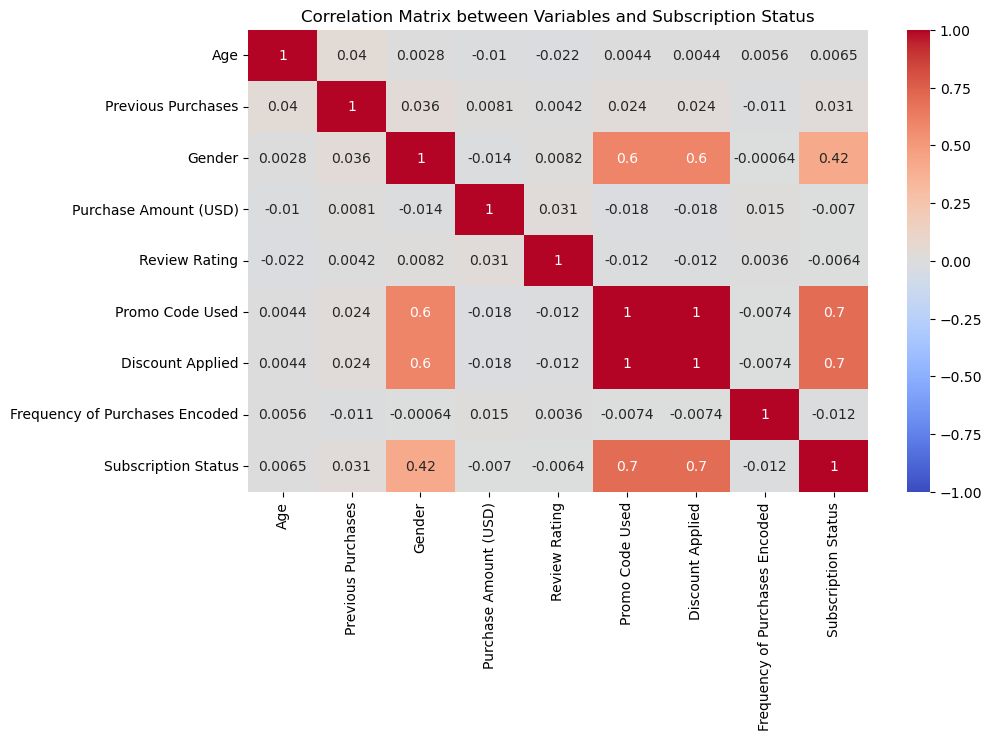

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# DẠNG SỐ ĐÃ MÃ HÓA 
correlation_columns = ['Age','Previous Purchases','Purchase Amount (USD)', 'Review Rating',
                 ,'Frequency of Purchases Encoded','Subscription Status']


corr_matrix = df[correlation_columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Variables and Subscription Status')
plt.show()


**Phân tích kết quả**

**Age**: 0.0065 (Mối tương quan gần như không có)

**Gender**: 0.42 (Mối tương quan dương trung bình, có sự ảnh hưởng)

**Purchase Amount (USD)**: -0.007 (Mối tương quan rất yếu, gần như không ảnh hưởng)

**Review Rating**: -0.0064 (Mối tương quan gần như không có)

**Promo Code Used**: 0.7 (Mối tương quan dương mạnh, ảnh hưởng lớn)

**Discount Applied**: 0.7 (Mối tương quan dương mạnh, ảnh hưởng lớn)

**Previous Purchases**: 0.031 (Mối tương quan rất yếu)

**Frequency of Purchases (Encoded)**: -0.012 (Mối tương quan rất yếu)

### Insights: 
**Promo Code Used và Discount Applied** có mối tương quan mạnh nhất với Subscription Status. Điều này cho thấy rằng những khách hàng sử dụng mã khuyến mãi hoặc được giảm giá có khả năng đăng ký cao hơn.

**Gender** có mối tương quan trung bình với Subscription Status, có nghĩa là giới tính của khách hàng cũng có ảnh hưởng đáng kể đến khả năng đăng ký.

Các yếu tố như **Age, Purchase Amount (USD), Review Rating, Previous Purchases, và Frequency of Purchases**a đều có hệ số tương quan rất thấp, cho thấy rằng những yếu tố này không có ảnh hưởng đáng kể đến việc khách hàng có đăng ký dịch vụ hay không.

## Xây dựng mô hình hồi quy tuyến tính 

**Biến phụ thuộc**: Subscription Status 

**Biến cố định**: Promo Code Used, Discount Applied, Gender 

In [29]:
from sklearn.model_selection import train_test_split

X = df[['Promo Code Used', 'Discount Applied', 'Gender']]
y = df['Subscription Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Subscription Status   R-squared:                       0.496
Model:                             OLS   Adj. R-squared:                  0.495
Method:                  Least Squares   F-statistic:                     1532.
Date:                 Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                         17:35:10   Log-Likelihood:                -812.14
No. Observations:                 3120   AIC:                             1630.
Df Residuals:                     3117   BIC:                             1648.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.61e-16   

# Kiểm tra giả định 

b, Phân phối chuẩn của  εi

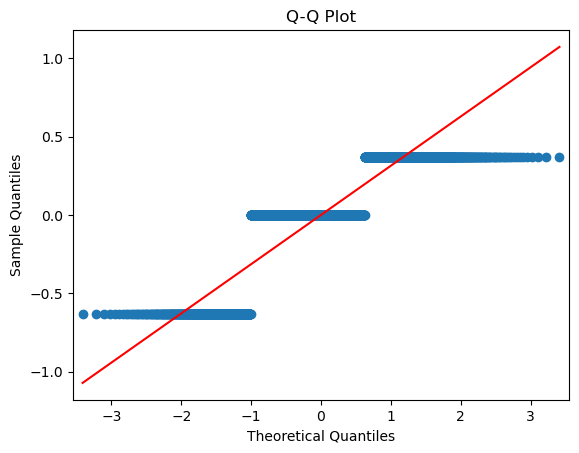

Shapiro-Wilk Test: Statistic=0.753618285408711, p-value=6.253928353461724e-56


In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q Plot
sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot")
plt.show()

# Kiểm định Shapiro-Wilk
shapiro_test = stats.shapiro(model.resid)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')


-> Statistic: Giá trị thống kê (Statistic) là 0.7536. Giá trị này thường dao động từ 0 đến 1, với giá trị gần 1 cho thấy dữ liệu có xu hướng phân phối chuẩn hơn.

p-value: Giá trị p rất nhỏ (gần như bằng 0) cho thấy rằng có một bằng chứng rất mạnh để bác bỏ giả thuyết không (null hypothesis) rằng dữ liệu có phân phối chuẩn. Thông thường, nếu p-value nhỏ hơn 0.05 hoặc 0.01, chúng ta sẽ kết luận rằng dữ liệu không tuân theo phân phối chuẩn.

Kết Luận
Với p-value cực kỳ nhỏ (p-value 
<
0.001
<0.001), có thể kết luận rằng dữ liệu không phân phối chuẩn. 

-> Điều này có thể ảnh hưởng đến việc sử dụng các phương pháp hồi quy tuyến tính (giả định rằng dữ liệu có phân phối chuẩn)

In [ ]:
c, Giá trị trung bình của  εi là 00

In [18]:
mean_residuals = model.resid.mean()
print(f'Mean of Residuals: {mean_residuals}')


Mean of Residuals: 1.4831440918710424e-16


-> Một giá trị trung bình của sai số rất gần 0 cho thấy rằng, trung bình, mô hình của bạn không có xu hướng hệ thống để dự đoán quá cao hoặc quá thấp. Điều này có thể chỉ ra rằng mô hình đang hoạt động tốt về mặt việc bù đắp cho các dự đoán sai.

-> Phù hợp với mô hình hồi quy tuyến tính 

d, Phương sai σ² cố định 

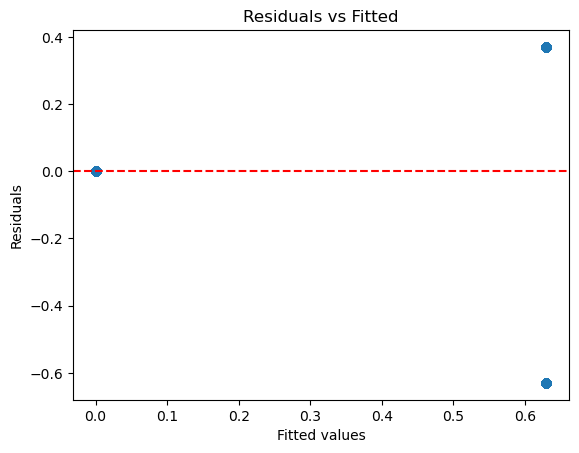

Breusch-Pagan Test: LM Statistic=2076.4236277903738, p-value=0.0


In [19]:
# Biểu đồ Residuals vs Fitted
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Kiểm định Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan Test: LM Statistic={bp_test[0]}, p-value={bp_test[1]}')


-> Kết quả kiểm tra giả định cho thấy mô hình hồi quy tuyến tính không phù hợp do vi phạm giả định về phương sai không đổi (homoscedasticity), được xác định thông qua kết quả của Breusch-Pagan Test với p-value = 0.0.

-> Điều này có nghĩa là phương sai của các phần dư trong mô hình không đồng nhất

e, Không có tương quan giữa các εi

In [35]:
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson Statistic: {dw_statistic}')


Durbin-Watson Statistic: 1.9870546327988292


-> Giá trị 1.987: Gần 2, cho thấy không có tự tương quan trong phần dư của mô hình hồi quy. Điều này có nghĩa là các phần dư (hay sai số) không có mối quan hệ tương quan với nhau

-> Phù hợp xây dựng mô hình hồi quy tuyến tính.

## Tóm Tắt Kết Quả Hồi Quy
**1. Thông Tin Tổng Quan**

**Số Quan Sát**: 3120

**R-squared**: 0.496: Điều này có nghĩa là khoảng 49.6% phương sai của biến phụ thuộc Subscription Status được giải thích bởi các biến độc lập trong mô hình. Mặc dù không phải là một giá trị rất cao, nhưng cho thấy mô hình có khả năng giải thích một phần đáng kể của dữ liệu.

**Adj. R-squared**: 0.495: Giá trị điều chỉnh R-squared chỉ ra rằng mô hình không có biến độc lập nào dư thừa, mà có đóng góp thực sự vào việc giải thích biến phụ thuộc.

**2. Kiểm Định F-statistic**:

**F-statistic**: 1532
**Prob (F-statistic)**: 0.00

-> Giá trị F-statistic rất cao và p-value thấp chứng tỏ rằng mô hình có ý nghĩa thống kê, nghĩa là ít nhất một trong các biến độc lập có ảnh hưởng đến biến phụ thuộc.

**3. Hệ Số Hồi Quy**:

**Hệ số cho Promo Code Used**: 0.3150
**Hệ số cho Discount Applied**: 0.3150

Cả hai biến này có p-value = 0.000, cho thấy rằng chúng có ý nghĩa thống kê cao và có ảnh hưởng tích cực đến khả năng đăng ký của khách hàng. Tức là, khi khách hàng sử dụng mã khuyến mãi hoặc được giảm giá, khả năng họ đăng ký dịch vụ tăng lên.

**Hệ số cho Gender**: 1.732e-16: Giá trị này rất nhỏ với p-value = 1.000, cho thấy giới tính không có ảnh hưởng đáng kể đến khả năng đăng ký trong mô hình này.

**4. Phần Dư**:

**Omnibus**: 277.740
**Durbin-Watson**: 1.987: Giá trị Durbin-Watson gần 2 cho thấy không có vấn đề nghiêm trọng về tự tương quan giữa các phần dư, một điều tích cực cho mô hình.

**Skewness**: -0.828, cho thấy có sự lệch về phía trái trong phân phối phần dư.

**Kurtosis**: 3.052, cho thấy phần dư có độ nhọn gần giống với phân phối chuẩn.

**Vấn Đề Đa Cộng Tuyến**:

**Cond. No.: 1.18e+16**: Giá trị này cho thấy có thể có vấn đề đa cộng tuyến giữa các biến độc lập, điều này có thể ảnh hưởng đến độ chính xác của các hệ số hồi quy( do Promo Code Used và Discount Applied được áp dụng cùng lúc)

## Phân Tích Kết Quả:

Kết quả cho thấy rằng việc sử dụng mã khuyến mãi và áp dụng giảm giá là những yếu tố chính ảnh hưởng đến khả năng đăng ký của khách hàng. Điều này có thể hướng tới việc tối ưu hóa các chiến dịch khuyến mãi để tăng cường tỷ lệ đăng ký.

Giới tính không phải là yếu tố quan trọng trong mô hình này, có thể vì các chương trình khuyến mãi là hấp dẫn đối với tất cả các nhóm giới tính.

# Mô hình hồi quy Logistic 

## Kiểm tra giả định

1, Biến phụ thuộc là nhị phân 

In [37]:

print(df['Subscription Status'].value_counts())

Subscription Status
0    2847
1    1053
Name: count, dtype: int64


2, Mối quan hệ tuyến tính giữa logit của biến phụ thuộc và biến độc lập

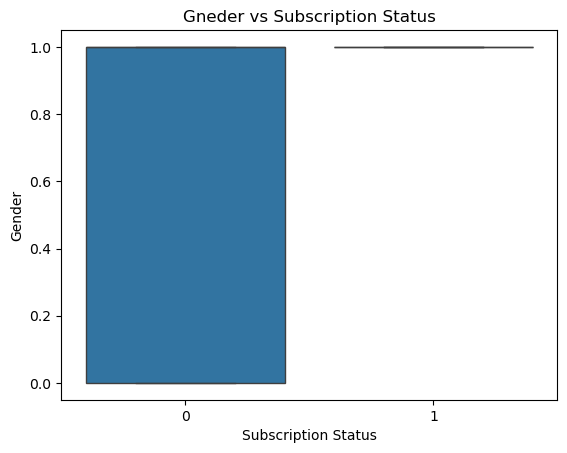

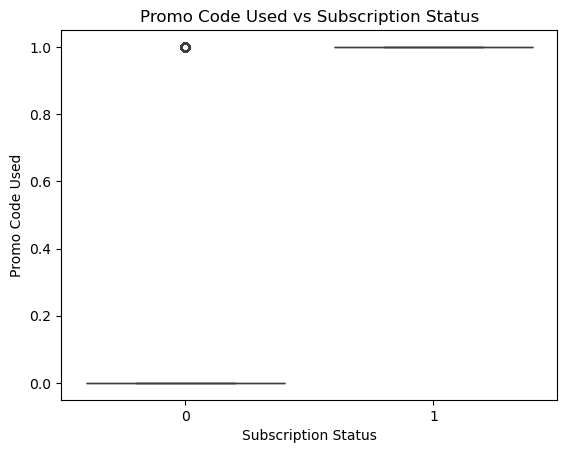

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Subscription Status', y='Gender', data=df)
plt.title('Gneder vs Subscription Status')
plt.show()

sns.boxplot(x='Subscription Status', y='Promo Code Used', data=df)
plt.title('Promo Code Used vs Subscription Status')
plt.show()


**Phân tích kết quả**

**Age**: 0.0065 (Mối tương quan gần như không có)

**Gender**: 0.42 (Mối tương quan dương trung bình, có sự ảnh hưởng)

**Purchase Amount (USD)**: -0.007 (Mối tương quan rất yếu, gần như không ảnh hưởng)

**Review Rating**: -0.0064 (Mối tương quan gần như không có)

**Promo Code Used**: 0.7 (Mối tương quan dương mạnh, ảnh hưởng lớn)

**Discount Applied**: 0.7 (Mối tương quan dương mạnh, ảnh hưởng lớn)

**Previous Purchases**: 0.031 (Mối tương quan rất yếu)

**Frequency of Purchases (Encoded)**: -0.012 (Mối tương quan rất yếu)

In [41]:

X = df[['Gender','Promo Code Used','Discount Applied']]
X = sm.add_constant(X)

y = df['Subscription Status']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[635 199]
 [  0 336]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       834
           1       0.63      1.00      0.77       336

    accuracy                           0.83      1170
   macro avg       0.81      0.88      0.82      1170
weighted avg       0.89      0.83      0.84      1170



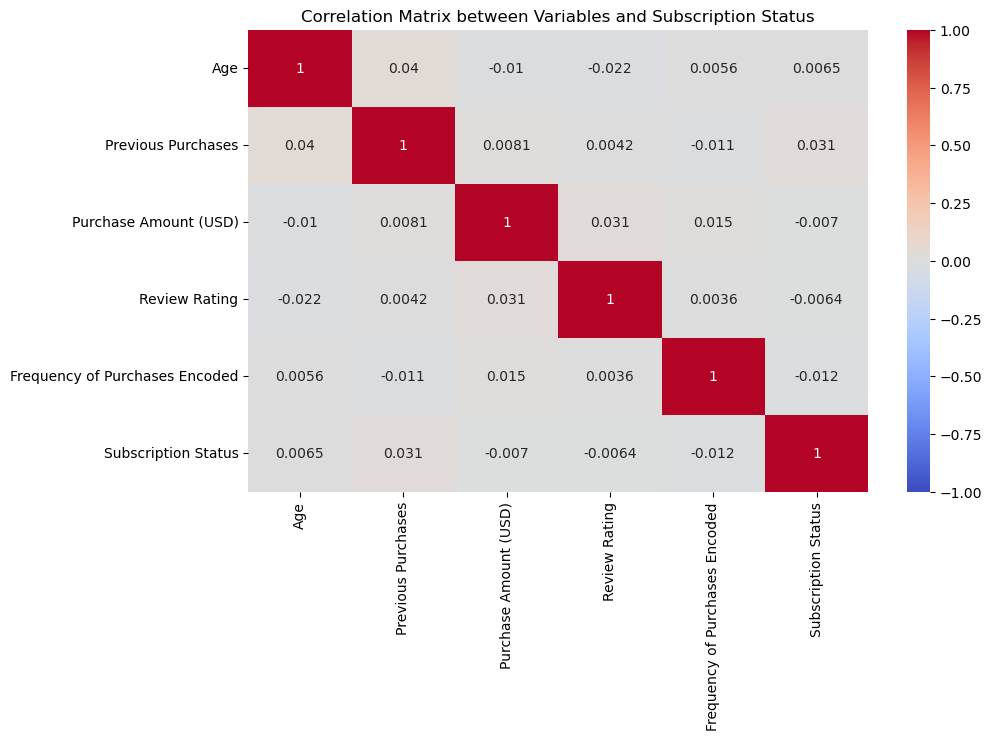

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# DẠNG SỐ ĐÃ MÃ HÓA 
correlation_columns = ['Age','Previous Purchases','Purchase Amount (USD)', 'Review Rating',
                 'Frequency of Purchases Encoded','Subscription Status']


corr_matrix = df[correlation_columns].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Variables and Subscription Status')
plt.show()
